In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import Functions as f

# Impact Crater Saturation Simulation - Part 2
## Final Project - ASTR 3750
### Name: Judit Bergfalk
### Date: November 25, 2020

In this project, impact craters are simulated on a square 500 km by 500 km surface area. Assuming impactors are striking the surface once in every 1000 years, creating a crater with a size specified by an estimated crater size distribution, the elapsed time of different percentage saturation is calculated and analyzed.

## SIMULATION 2 - Changing the crater diameters to range between 10 km and 11 km

#### CRATER SIZE DISTRIBUTION

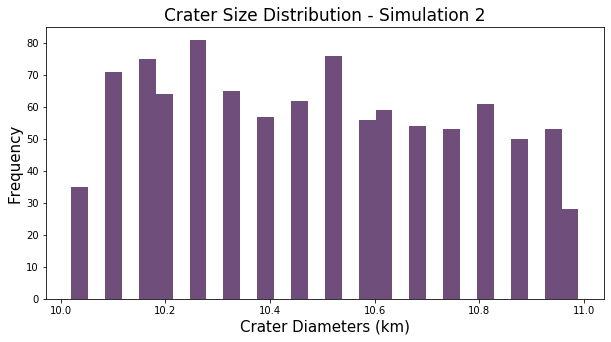

In [2]:
# Plot crater distribution
plt.figure(figsize=(10.0,5.0))
plt.hist(f.CraterCreator(10,11,size=1000), bins=30, color="#6f4e7c")
plt.title("Crater Size Distribution - Simulation 2", fontsize="17")
plt.xlabel("Crater Diameters (km)", fontsize="15")
plt.ylabel("Frequency", fontsize="15")
plt.show()

#### CRATER SIMULATION

The focal point of this project is the CraterSimulation function that simulates craters on a given surface and calculates the percentage of saturation. The function then outputs the times of saturation, the randomly generated positions and crater sizes. 

0.2529685356652949
77
mark 25%
0.5006537208504801
185
mark 50%
0.7505411951303155
368
mark 75%
1.0
3080
mark 100%


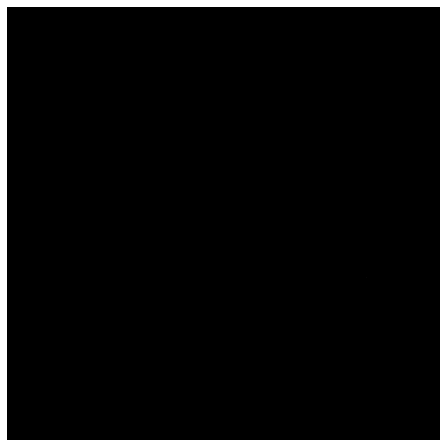

In [3]:
# Calling the CraterSimulation function
cratersim_values = f.CraterSimulation(10,11)

In [4]:
# Assigning names to the extracted values
position25 = cratersim_values[0]
position50 = cratersim_values[1]
position75 = cratersim_values[2]
position100 = cratersim_values[3]

nsat25time = cratersim_values[4][0]
nsat25sat = cratersim_values[4][1]
nsat50time = cratersim_values[5][0]
nsat50sat = cratersim_values[5][1]
nsat75time = cratersim_values[6][0]
nsat75sat = cratersim_values[6][1]
nsat100time = cratersim_values[7][0]
nsat100sat = cratersim_values[7][1]

xposition = cratersim_values[8]
yposition = cratersim_values[9]
cratersizes = cratersim_values[10]
saturationvalues = cratersim_values[11]

xvalues25 = xposition[:position25[0]]
yvalues25 = yposition[:position25[0]]
cratersizes25 = cratersizes[:position25[0]]
xvalues50 = xposition[:position50[0]]
yvalues50 = yposition[:position50[0]]
cratersizes50 = cratersizes[:position50[0]]
xvalues75 = xposition[:position75[0]]
yvalues75 = yposition[:position75[0]]
cratersizes75 = cratersizes[:position75[0]]
xvalues100 = xposition[:position100[0]]
yvalues100 = yposition[:position100[0]]
cratersizes100 = cratersizes[:position100[0]]

To determine if a crater is recognizable on the surface, the CraterCount function analyzes the changes in saturation and determines if the change is large enough to count a new crater on the surface. It is assumed that a crater is erased by another crater if the change in saturation is less than 25%.

In [5]:
# Crater counting
satchanges = f.SaturationChanges(cratersizes)
cratersovertime = f.CraterCount(saturationvalues,satchanges)

<Figure size 432x432 with 0 Axes>

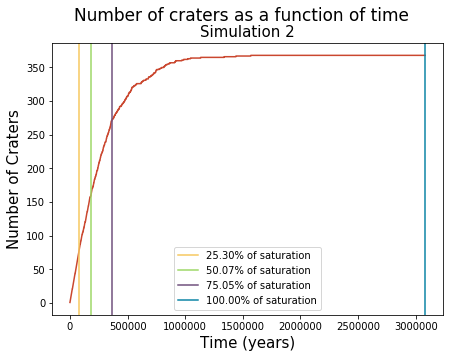

In [6]:
# Plot number of craters as a function of time
plt.figure(figsize=(7.0,5.0))

# Define values from above simulation
time = np.linspace(0,1000*len(cratersovertime),len(cratersovertime))

plt.plot(time,cratersovertime, color="#ca472f")
plt.axvline(nsat25time, label="{:.2f}% of saturation".format(nsat25sat*100), color="#f6c85f")
plt.axvline(nsat50time, label="{:.2f}% of saturation".format(nsat50sat*100), color="#9dd866")
plt.axvline(nsat75time, label="{:.2f}% of saturation".format(nsat75sat*100), color="#6f4e7c")
plt.axvline(nsat100time, label="{:.2f}% of saturation".format(nsat100sat*100), color="#0b84a5")
plt.suptitle("Number of craters as a function of time", fontsize="17")
plt.title("Simulation 2", fontsize="15")
plt.xlabel("Time (years)", fontsize="15")
plt.ylabel("Number of Craters", fontsize="15")
plt.legend()
plt.show()

For a visual representation of the surface with different times of saturation, the SaveSaturation functions saves the plot in a png format. 

In [7]:
# 25%
f.SaveSaturation(2,xvalues25,yvalues25,cratersizes25,nsat25sat,nsat25time,cratersovertime);

# 50%
f.SaveSaturation(2,xvalues50,yvalues50,cratersizes50,nsat50sat,nsat50time,cratersovertime);

# 75%
f.SaveSaturation(2,xvalues75,yvalues75,cratersizes75,nsat75sat,nsat75time,cratersovertime);

# 100%
f.SaveSaturation(2,xvalues100,yvalues100,cratersizes100,nsat100sat,nsat100time,cratersovertime);

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

The surface with random craters at 25%, 50%, 75% and 100% saturation are shown below.

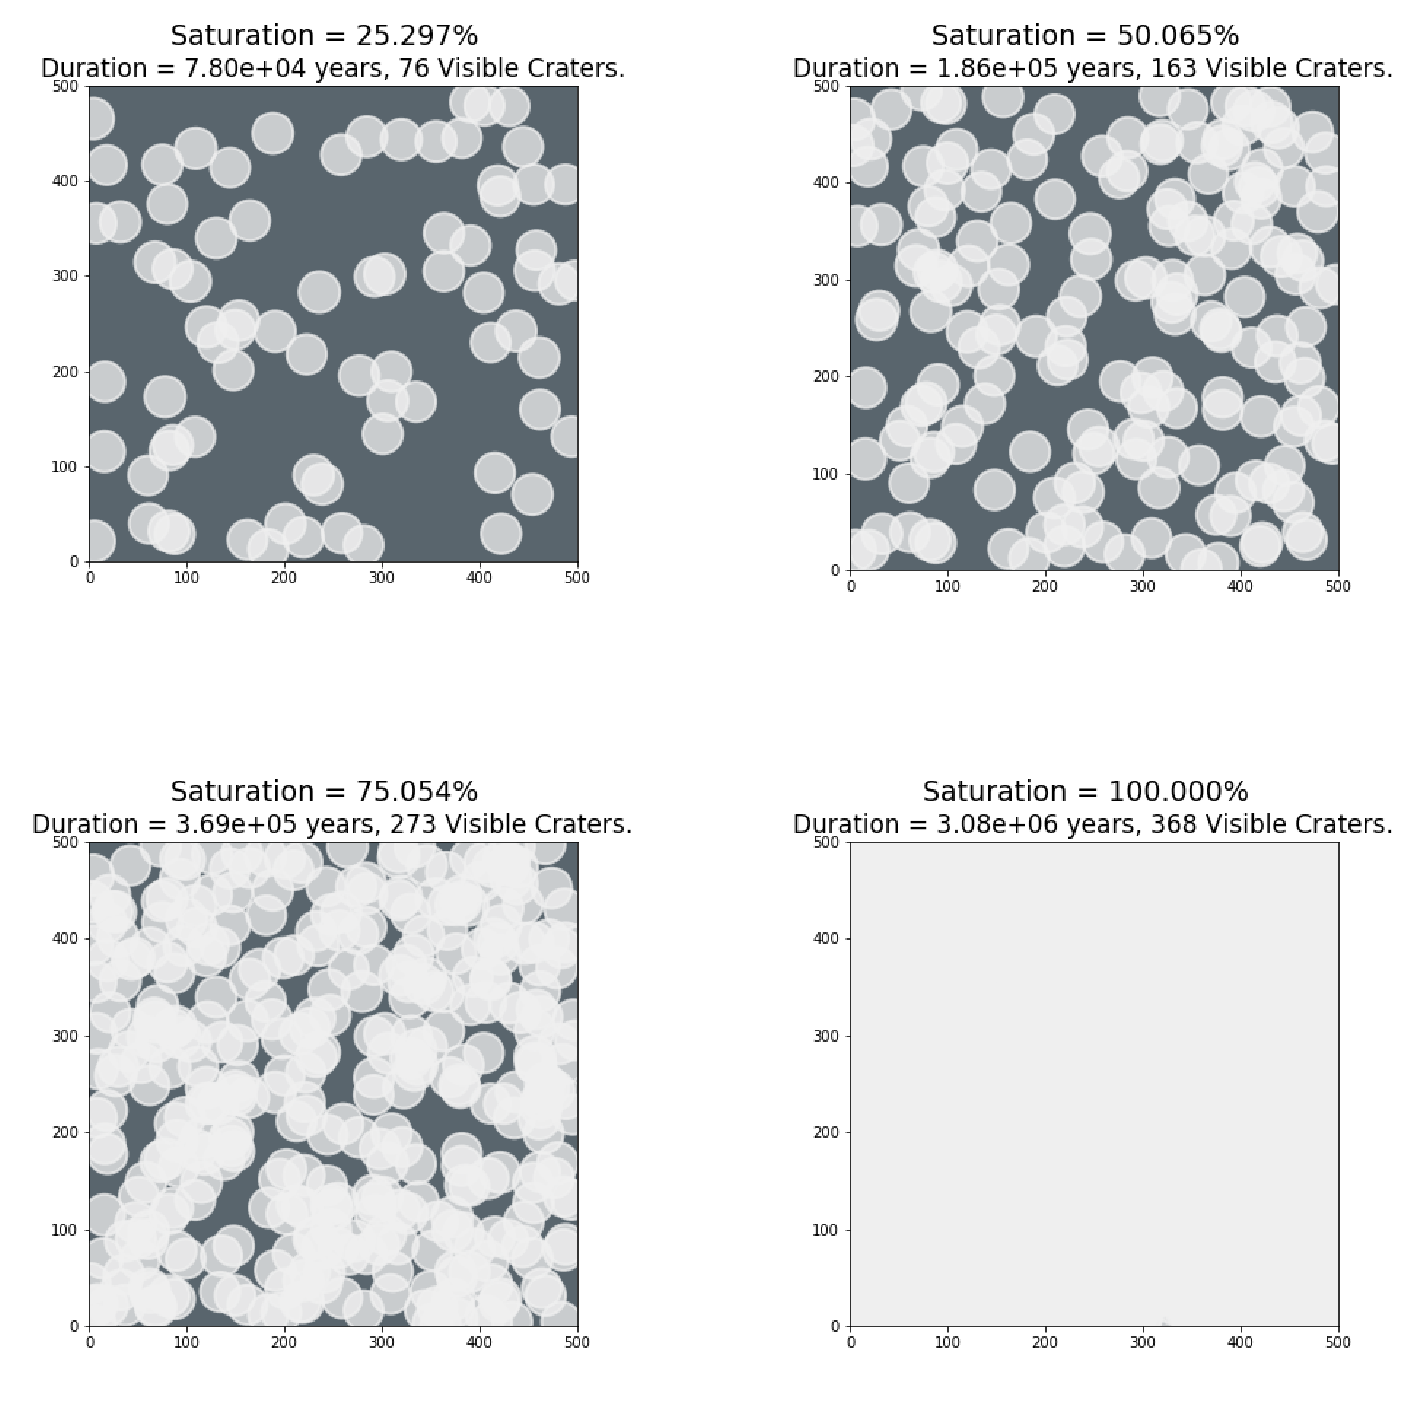

In [8]:
# Display percentage saturation on surface
from matplotlib.image import imread
fig2 = plt.figure(figsize=(18.0,18.0))
images = ['craters2-25.png','craters2-50.png','craters2-75.png','craters2-100.png']
for i in range(4):
    fig2.add_subplot(2,2,i+1)
    image = imread(images[i])
    plt.imshow(image)
    plt.axis('off')

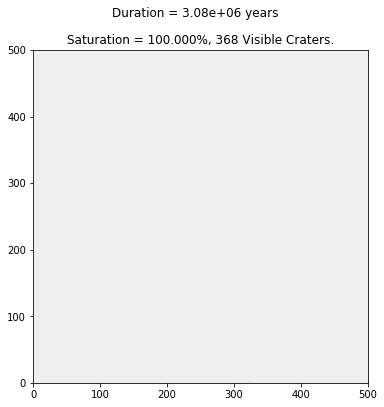

In [9]:
# Make a movie
f.ImpactMovie(2,xposition,yposition,cratersizes,saturationvalues,time,cratersovertime)